In [2]:
#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import catBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

ModuleNotFoundError: No module named 'catboost'

In [3]:
df = pd.read_csv('Heart_Disease_Prediction (1).csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
df.head(270)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [5]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [6]:
df.shape

(270, 14)

In [7]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [8]:
#from collections import Counter

In [9]:
#print(sorted(Counter(df['Heart Disease']).items()))

In [10]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# Explore Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [12]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

# Check Null Values

In [13]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [14]:
#all rows control for null values
df.isna().values.any()

False

In [15]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

# Duplicated values

In [16]:
df.duplicated().sum()

0

In [17]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(270, 14)

# Data Analysis & Visualization  using Seaborn Library, pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

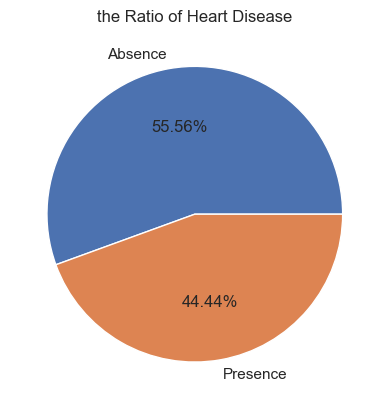

In [19]:
#show Ratio of HeartDisease from data
plt.pie(x = df['Heart Disease'].value_counts() ,autopct='%1.2f%%' ,labels=df['Heart Disease'].value_counts().index)
plt.title('the Ratio of Heart Disease')
plt.show

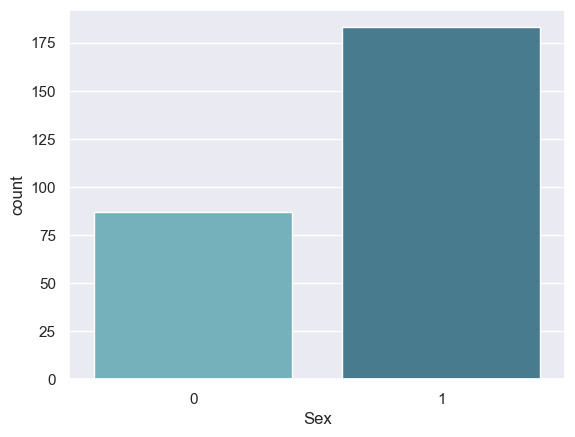

In [20]:
#show how many of Male and female 
sns.countplot(x = df['Sex'], palette='GnBu_d')
plt.show()

In [21]:
df.groupby(['Sex','Heart Disease'])['Heart Disease'].count()

Sex  Heart Disease
0    Absence           67
     Presence          20
1    Absence           83
     Presence         100
Name: Heart Disease, dtype: int64

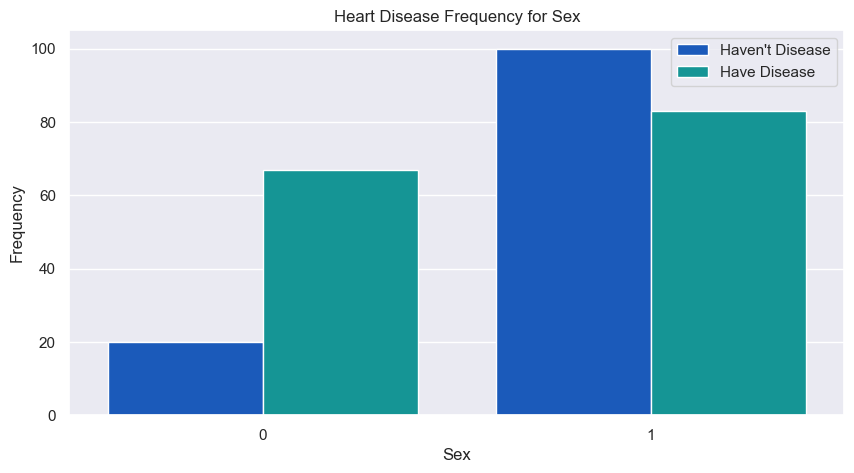

In [22]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='Heart Disease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [23]:
df.groupby(['Age','Heart Disease'])['Heart Disease'].count()

Age  Heart Disease
29   Absence          1
34   Absence          2
35   Absence          1
     Presence         2
37   Absence          2
                     ..
70   Presence         3
71   Absence          3
74   Absence          1
76   Absence          1
77   Presence         1
Name: Heart Disease, Length: 74, dtype: int64

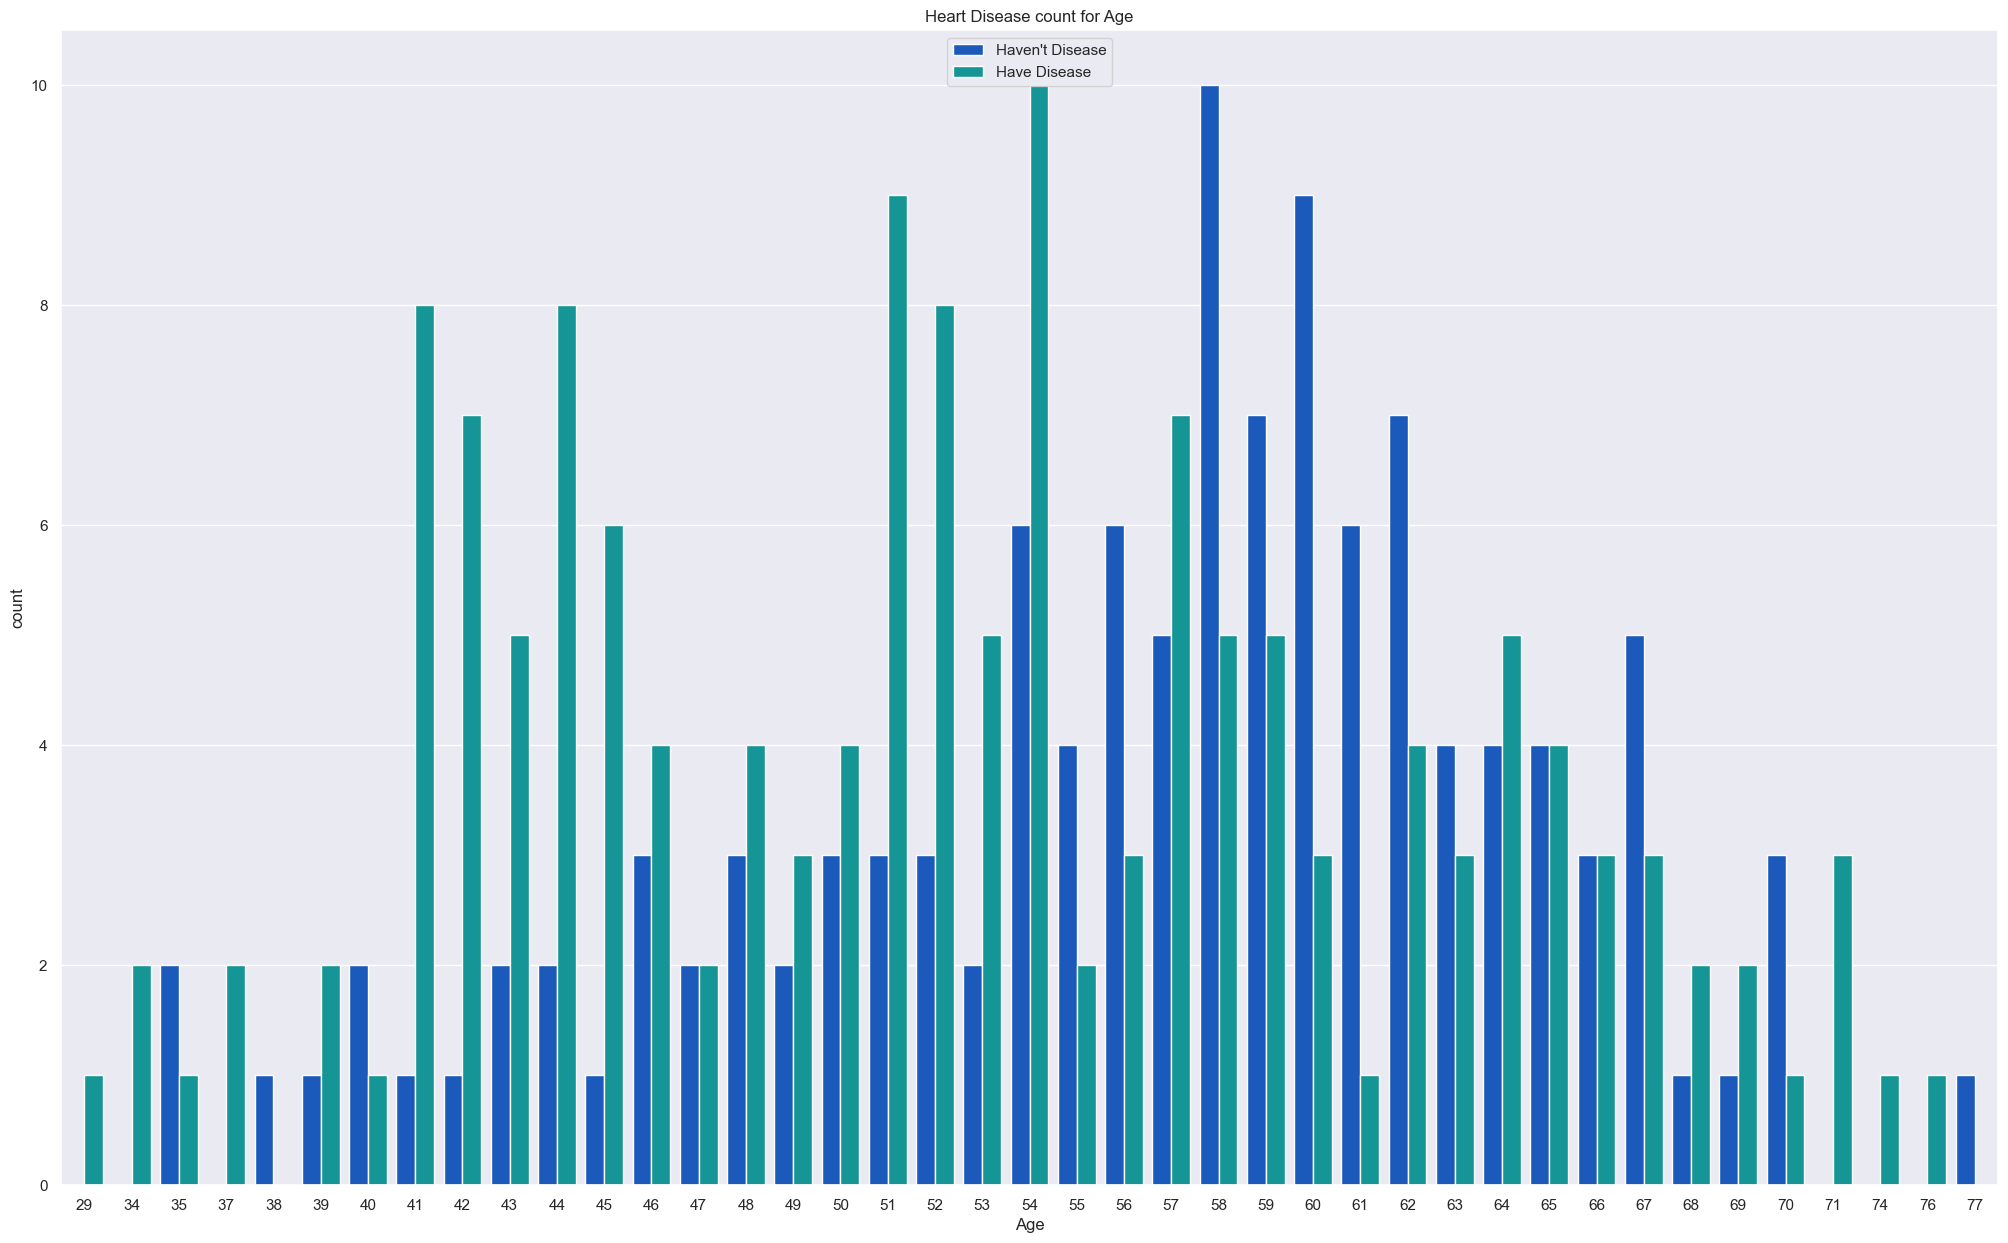

In [24]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(25,15))
sns.countplot(x = df['Age'], data=df, hue='Heart Disease',palette="winter")
plt.title('Heart Disease count for Age')
plt.xlabel('Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('count')
plt.show()

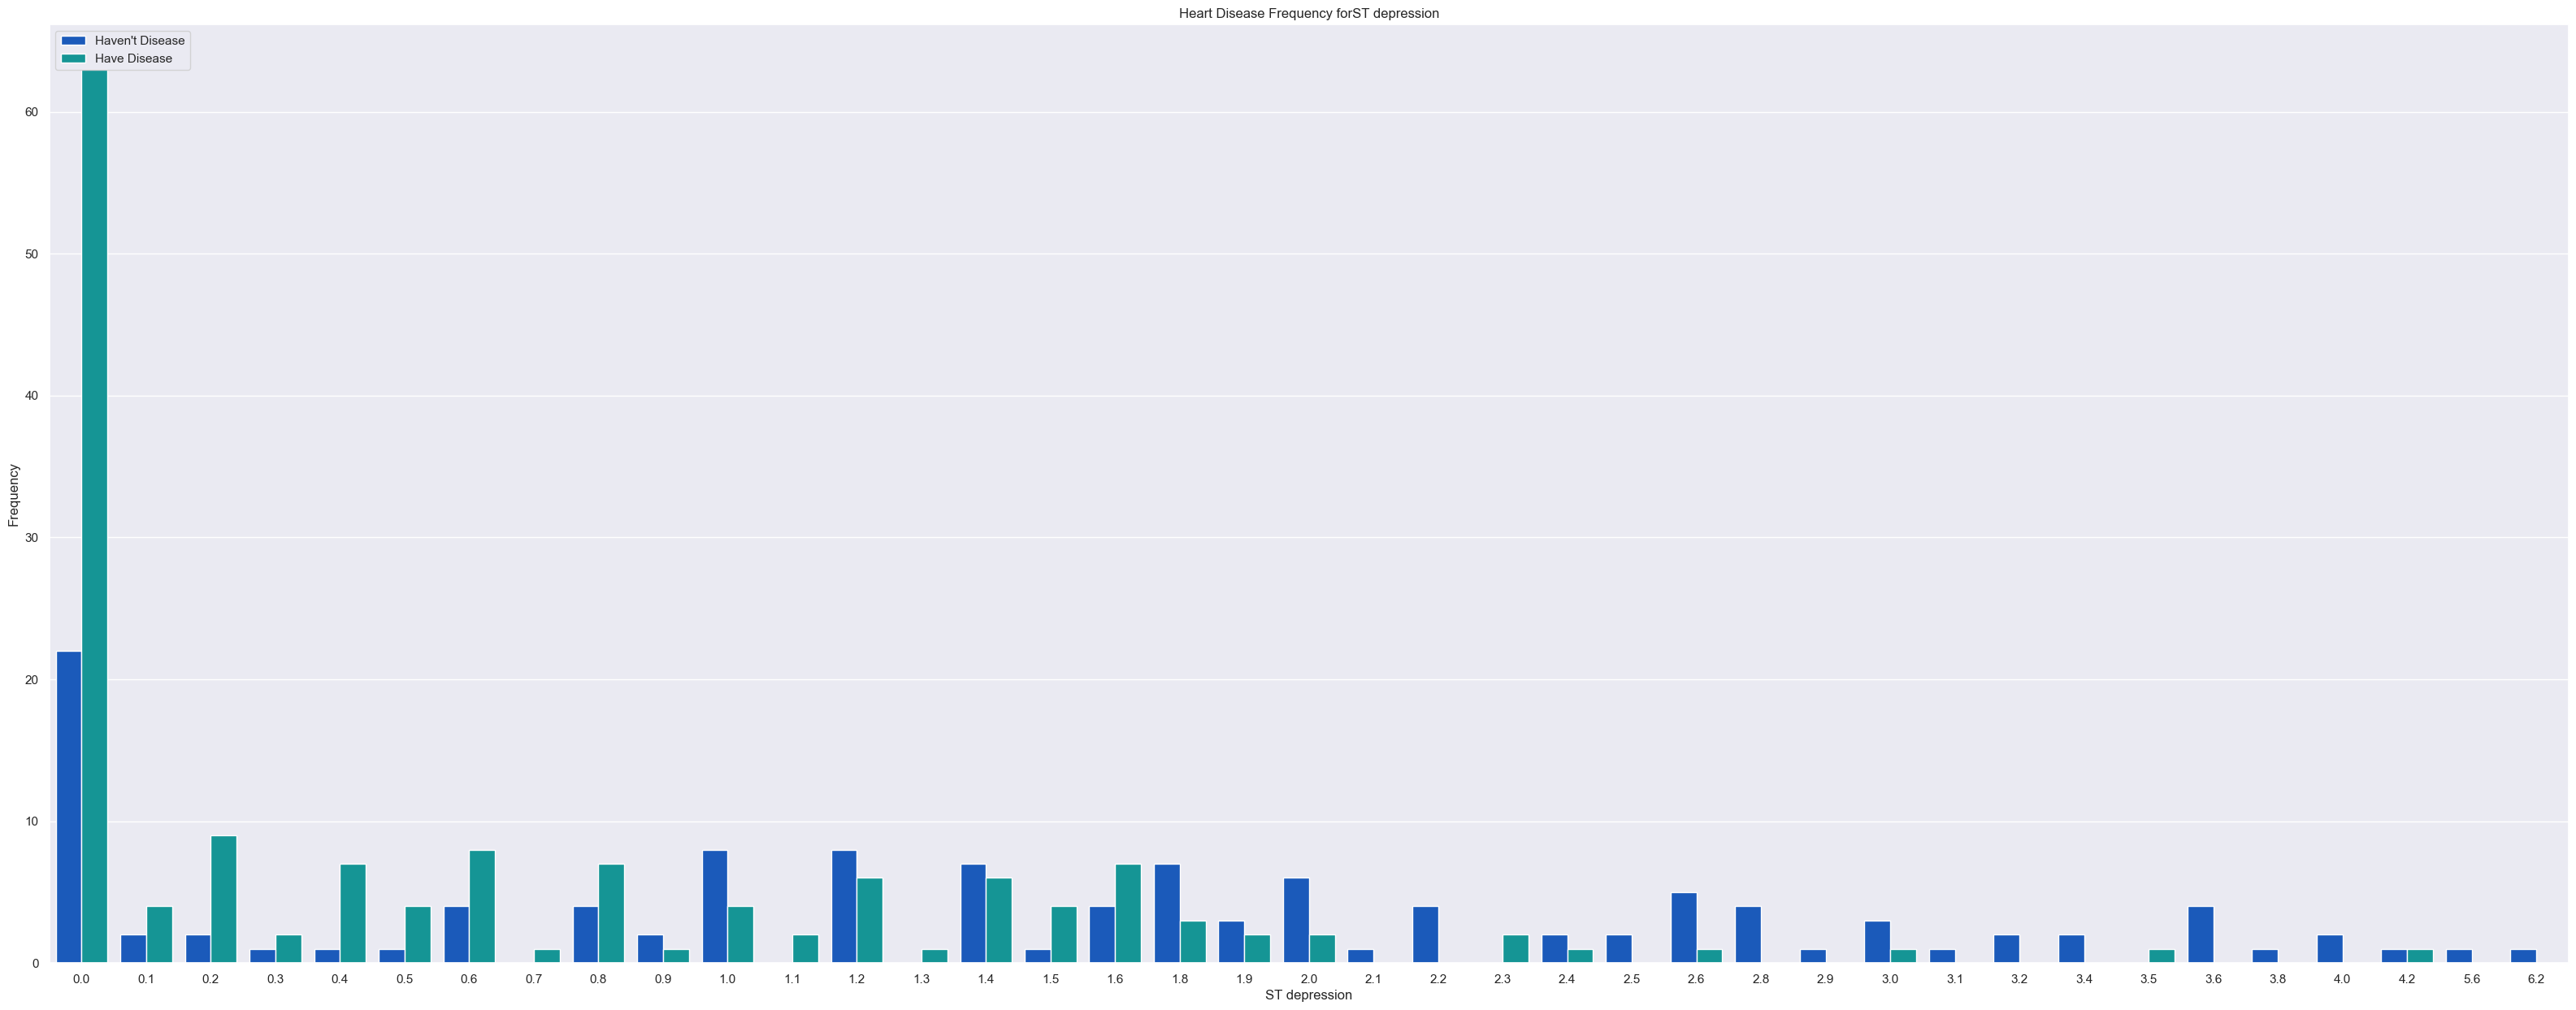

In [25]:
#show Heart Disease Frequency for ST depression
plt.figure(figsize=(40,15))
sns.countplot(x = df['ST depression'], data=df, hue='Heart Disease',palette="winter")
plt.title('Heart Disease Frequency forST depression')
plt.xlabel('ST depression')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [26]:
#AgeCategory frequency
#df['AgeCategory'].value_counts()

In [27]:
df.groupby(['BP','Heart Disease'])['Heart Disease'].count()

BP   Heart Disease
94   Absence          2
100  Absence          2
     Presence         2
101  Absence          1
102  Absence          2
                     ..
178  Presence         1
180  Absence          1
     Presence         2
192  Presence         1
200  Presence         1
Name: Heart Disease, Length: 72, dtype: int64

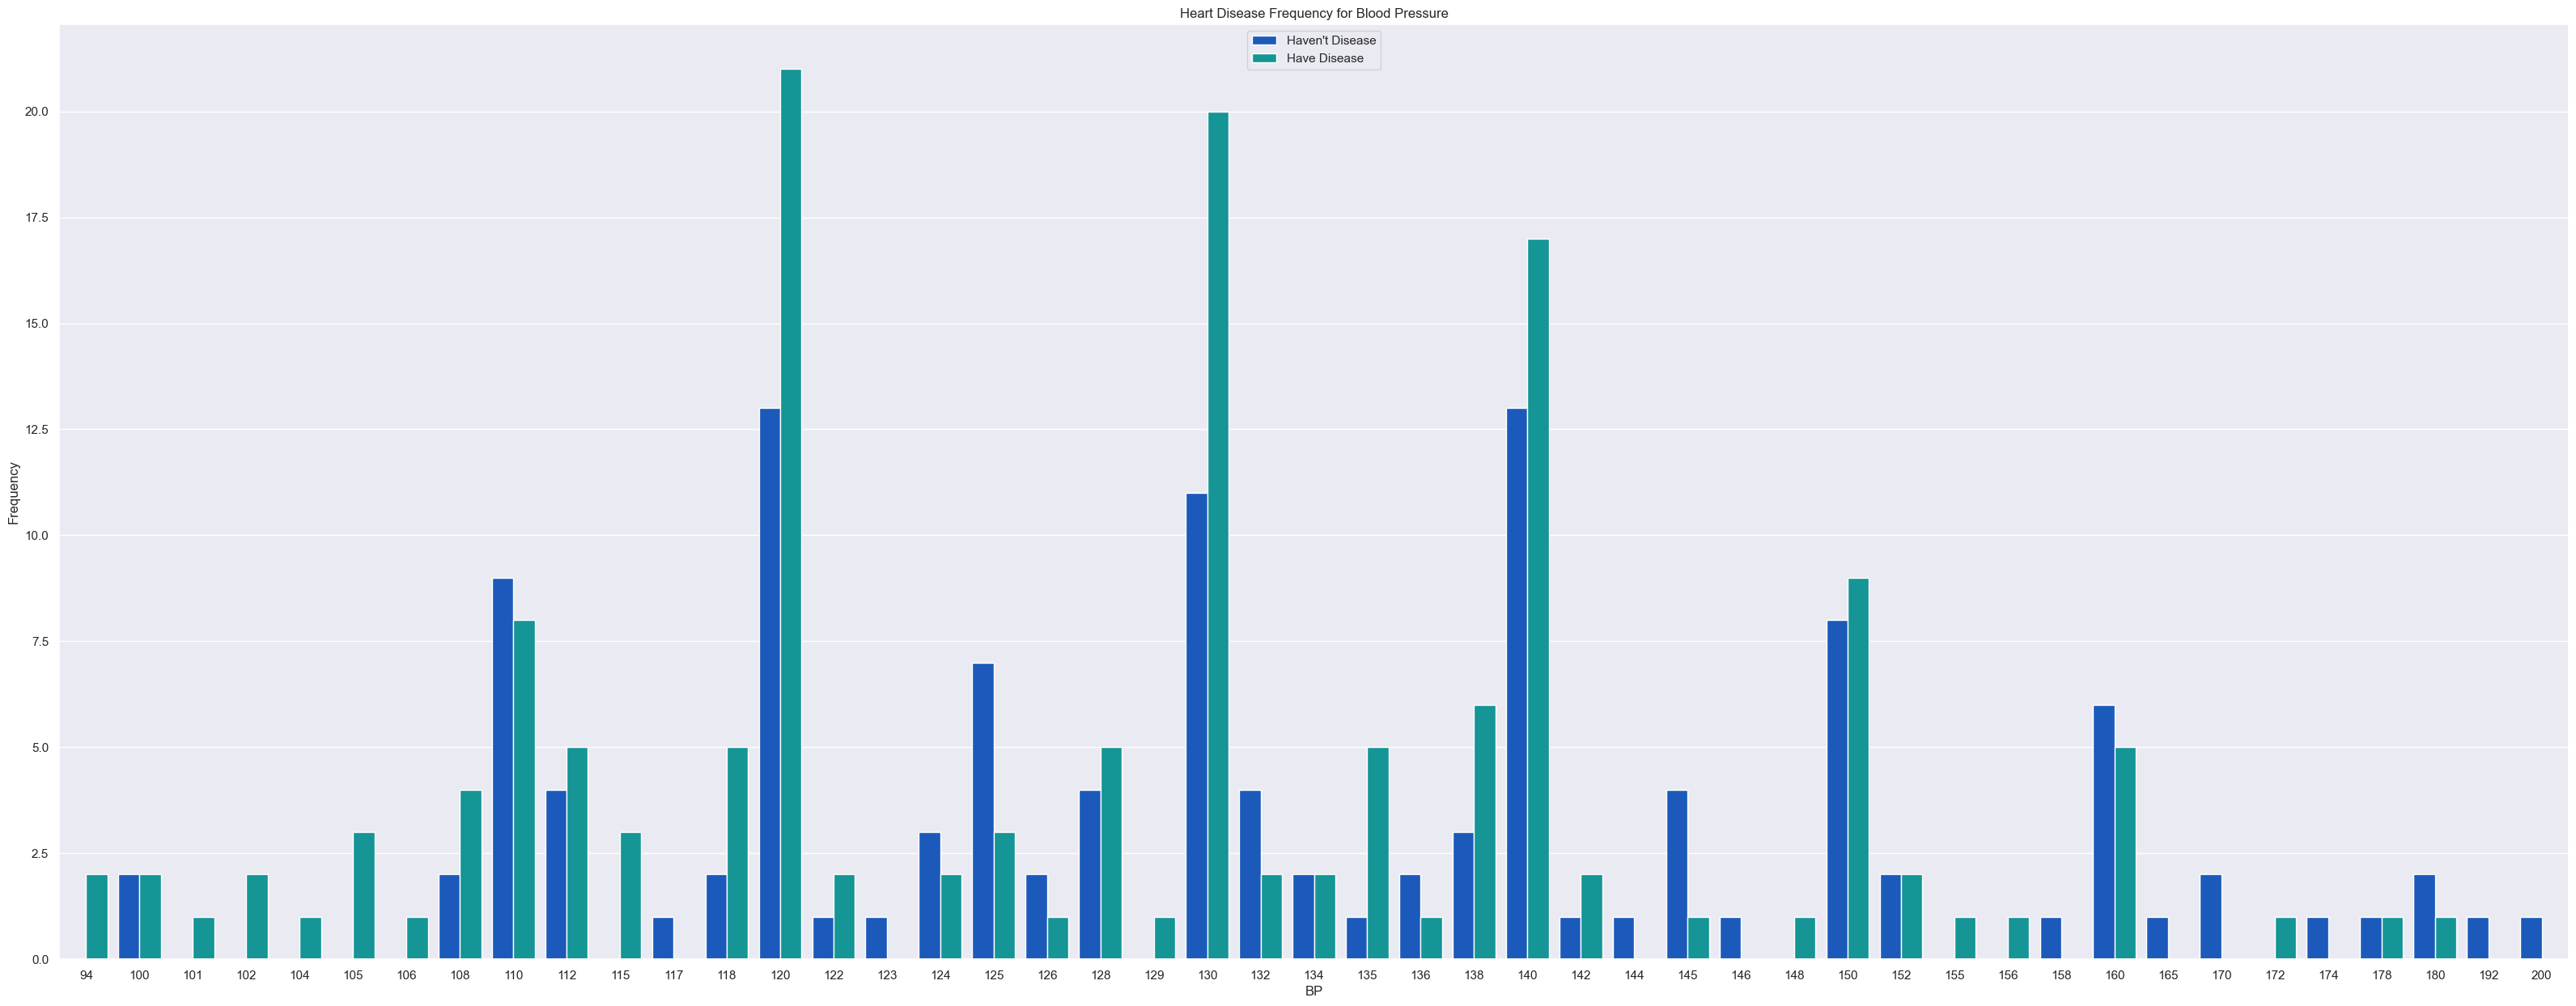

In [28]:
#show Heart Disease Frequency for BP
plt.figure(figsize=(40,15))
sns.countplot(x='BP', data=df, hue='Heart Disease',palette="winter")
plt.title('Heart Disease Frequency for Blood Pressure')
plt.xlabel('BP')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

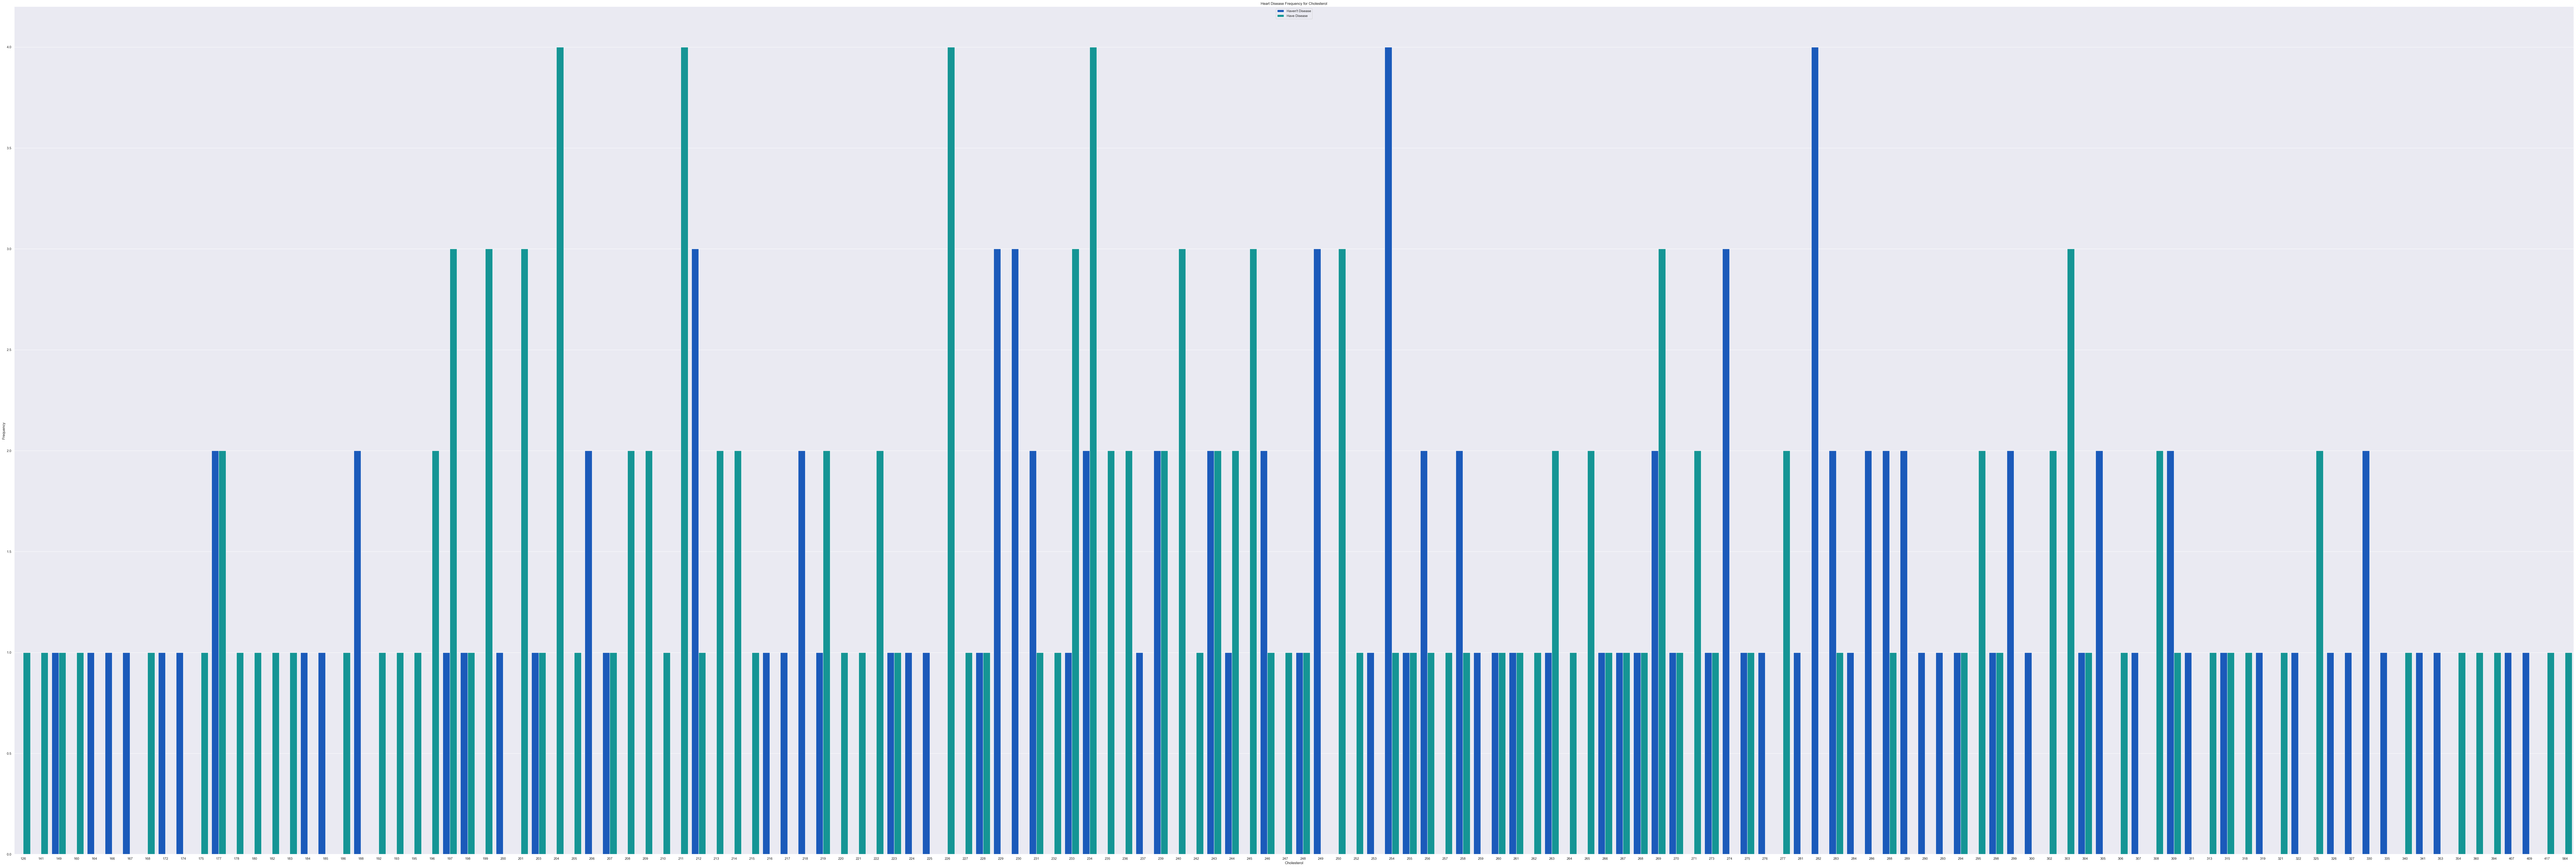

In [29]:
#show Heart Disease Frequency for Cholesterol
plt.figure(figsize=(150,50))
sns.countplot(x = df['Cholesterol'], data=df, hue='Heart Disease',palette="winter")
plt.title('Heart Disease Frequency for Cholesterol')
plt.xlabel('Cholesterol')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [30]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


Text(0.5, 1.0, 'Annotated values \u200b\u200bof correlation coefficients for each pair of features')

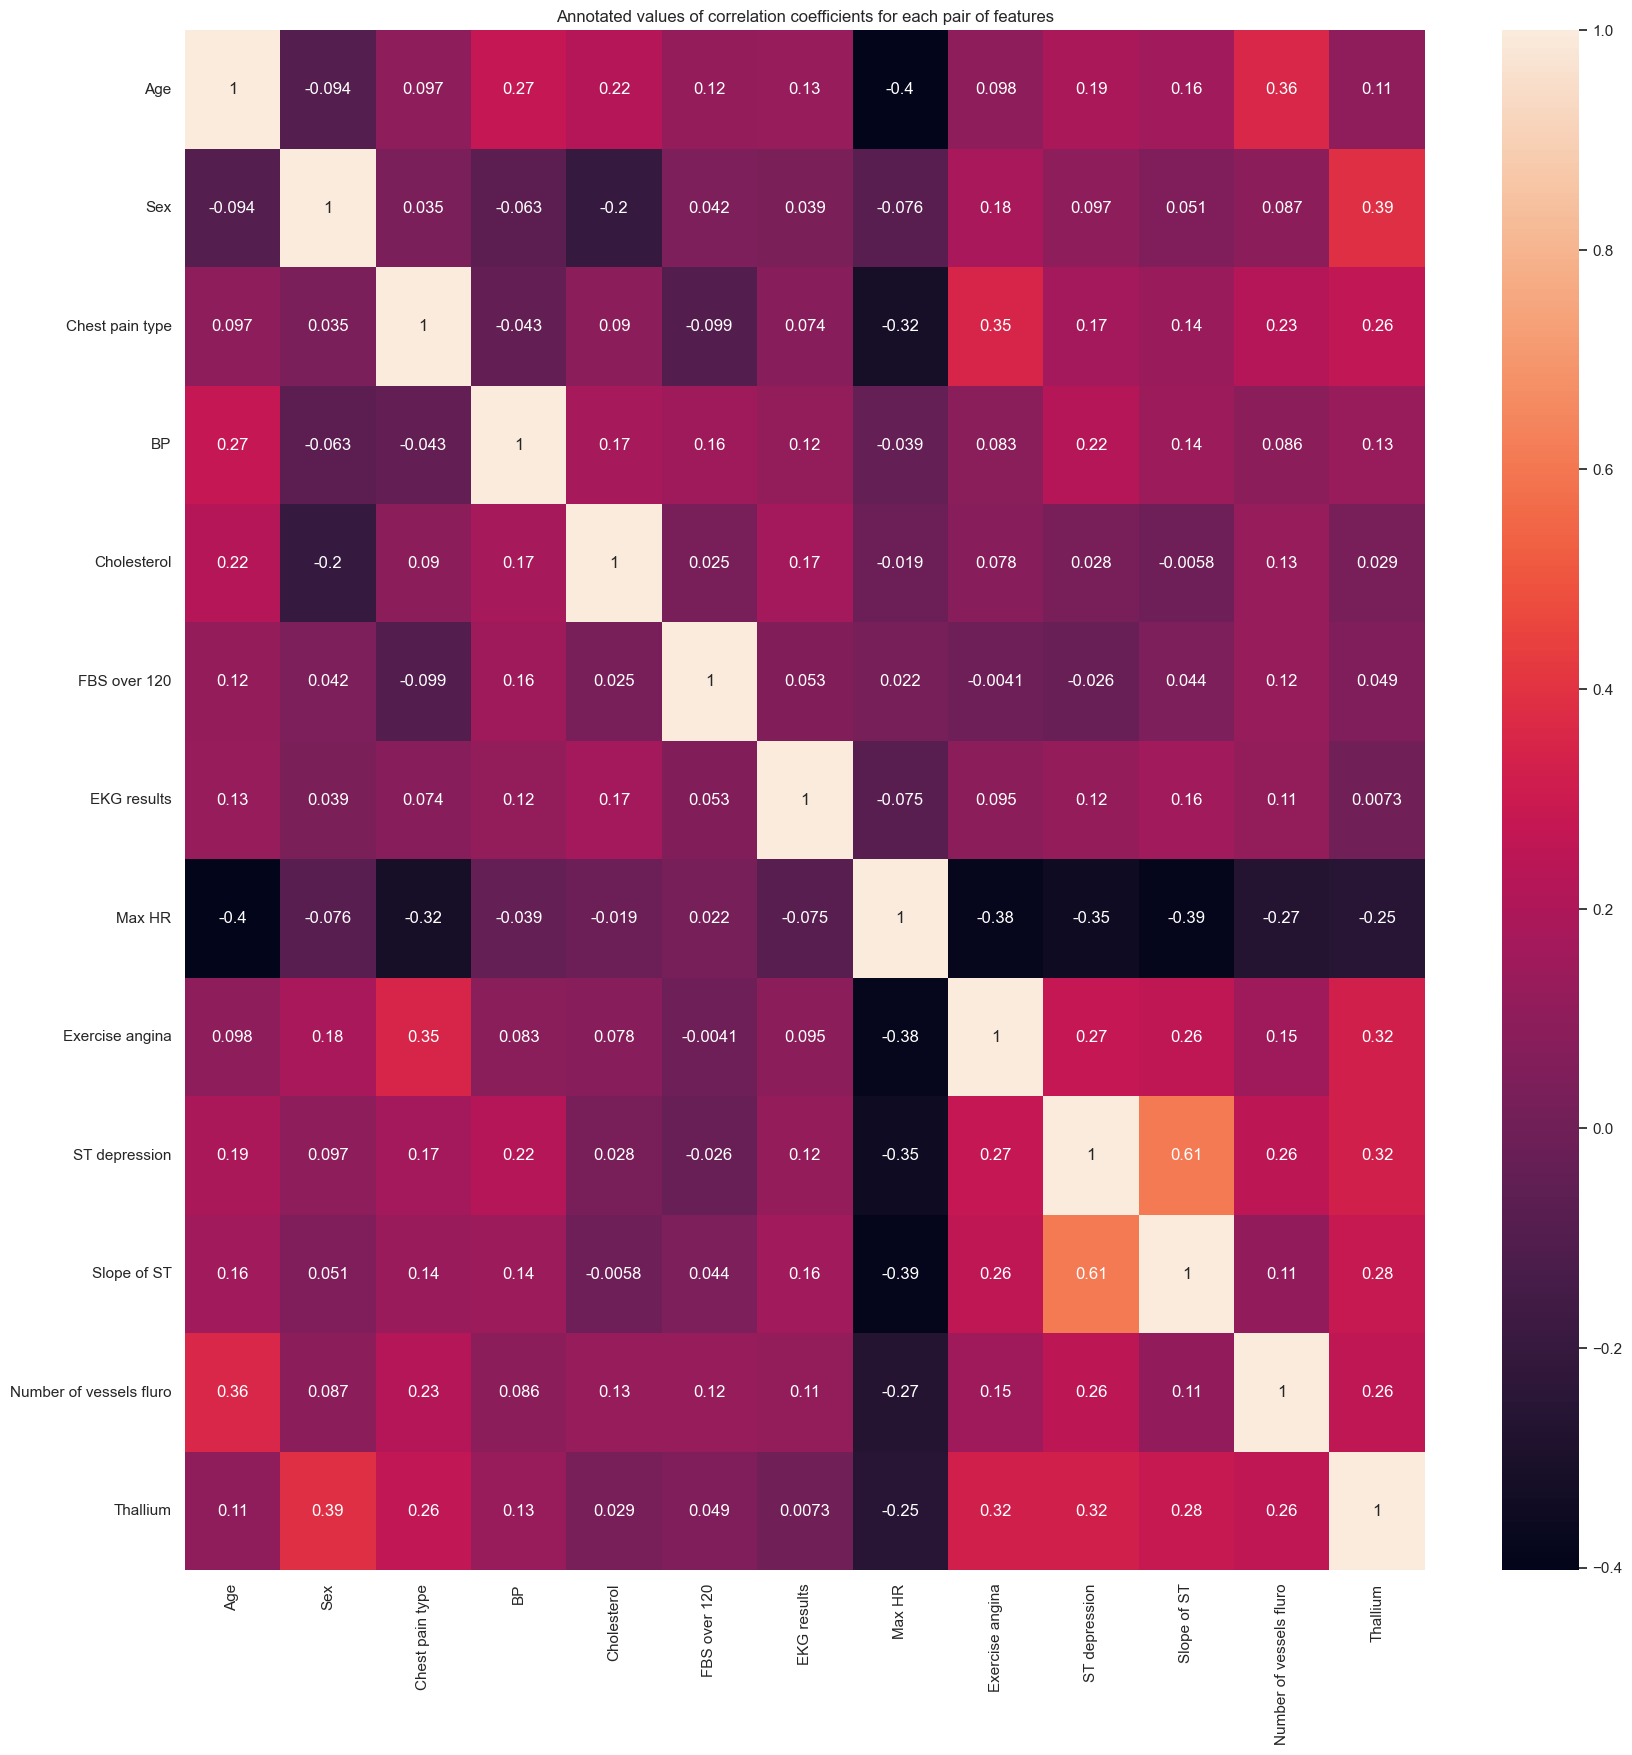

In [31]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(),annot=True)
plt.title('Annotated values ​​of correlation coefficients for each pair of features')

In [32]:
#the count of people Smoking
#df['Smoking'].value_counts()

In [33]:
#df.groupby(['Sex','AgeCategory','Smoking','HeartDisease'])['HeartDisease'].count()

In [34]:
#show Heart Disease Frequency for Smoking
#plt.figure(figsize=(10,5))
#sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
#plt.title('Heart Disease of Smoking people')
#plt.legend(["Haven't Disease", "Have Disease"])
#plt.xlabel('Smoking')
#plt.show()

In [35]:
# I want to Know how many people drink the AlcoholDrinking or not 
#df['AlcoholDrinking'].value_counts()

In [36]:
#df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

In [37]:
#df.groupby(['Sex','AgeCategory','AlcoholDrinking','PhysicalActivity','HeartDisease'])['HeartDisease'].count()

In [38]:
#Show how many people drink the AlcoholDrinking or not 
#plt.figure(figsize=(10,6))
#sns.countplot(x=df['AlcoholDrinking'],data=df , hue='HeartDisease',palette='winter')
#plt.title('people drinking the AlcoholDrinking')
#plt.legend(["Haven't Disease", "Have Disease"])
#plt.xlabel('AlcoholDrinking')
#plt.show()

In [39]:
#I want to know how many people have KidneyDisease
#df['KidneyDisease'].value_counts()

In [40]:
#show the peolple who have KidneyDisease and HeartDisease
#df.groupby(['KidneyDisease','HeartDisease'])['HeartDisease'].count()

In [41]:
#plt.figure(figsize=(10,5))
#sns.countplot( x = 'KidneyDisease', data=df, hue='HeartDisease',palette=['blue','green'])
#plt.title('people have KidneyDisease')
#plt.legend(["Haven't Disease", "Have Disease"])
#plt.show()

In [42]:
#df.groupby(['Sex','KidneyDisease'])['KidneyDisease'].count()

In [43]:
#Show the SkinCancer  
#df['SkinCancer'].value_counts()

In [44]:
#Show people have SkinCancer
#df.groupby(['Sex','SkinCancer'])['SkinCancer'].count()

In [45]:
#plt.figure(figsize=(10,5))
#sns.countplot(x='Sex',data=df, hue='SkinCancer',palette='winter')
#plt.title('people have SkinCancer')
#plt.show()

In [46]:
#df.groupby(['Sex','SkinCancer','HeartDisease'])['HeartDisease'].count()

In [47]:
#sns.countplot(x = 'SkinCancer', data=df , hue = 'HeartDisease')
#plt.title('people have SkinCancer and HeartDisease')
#plt.legend(["Haven't Disease", "Have Disease"])
#plt.show()

# Check the Distribution and skewness of the features

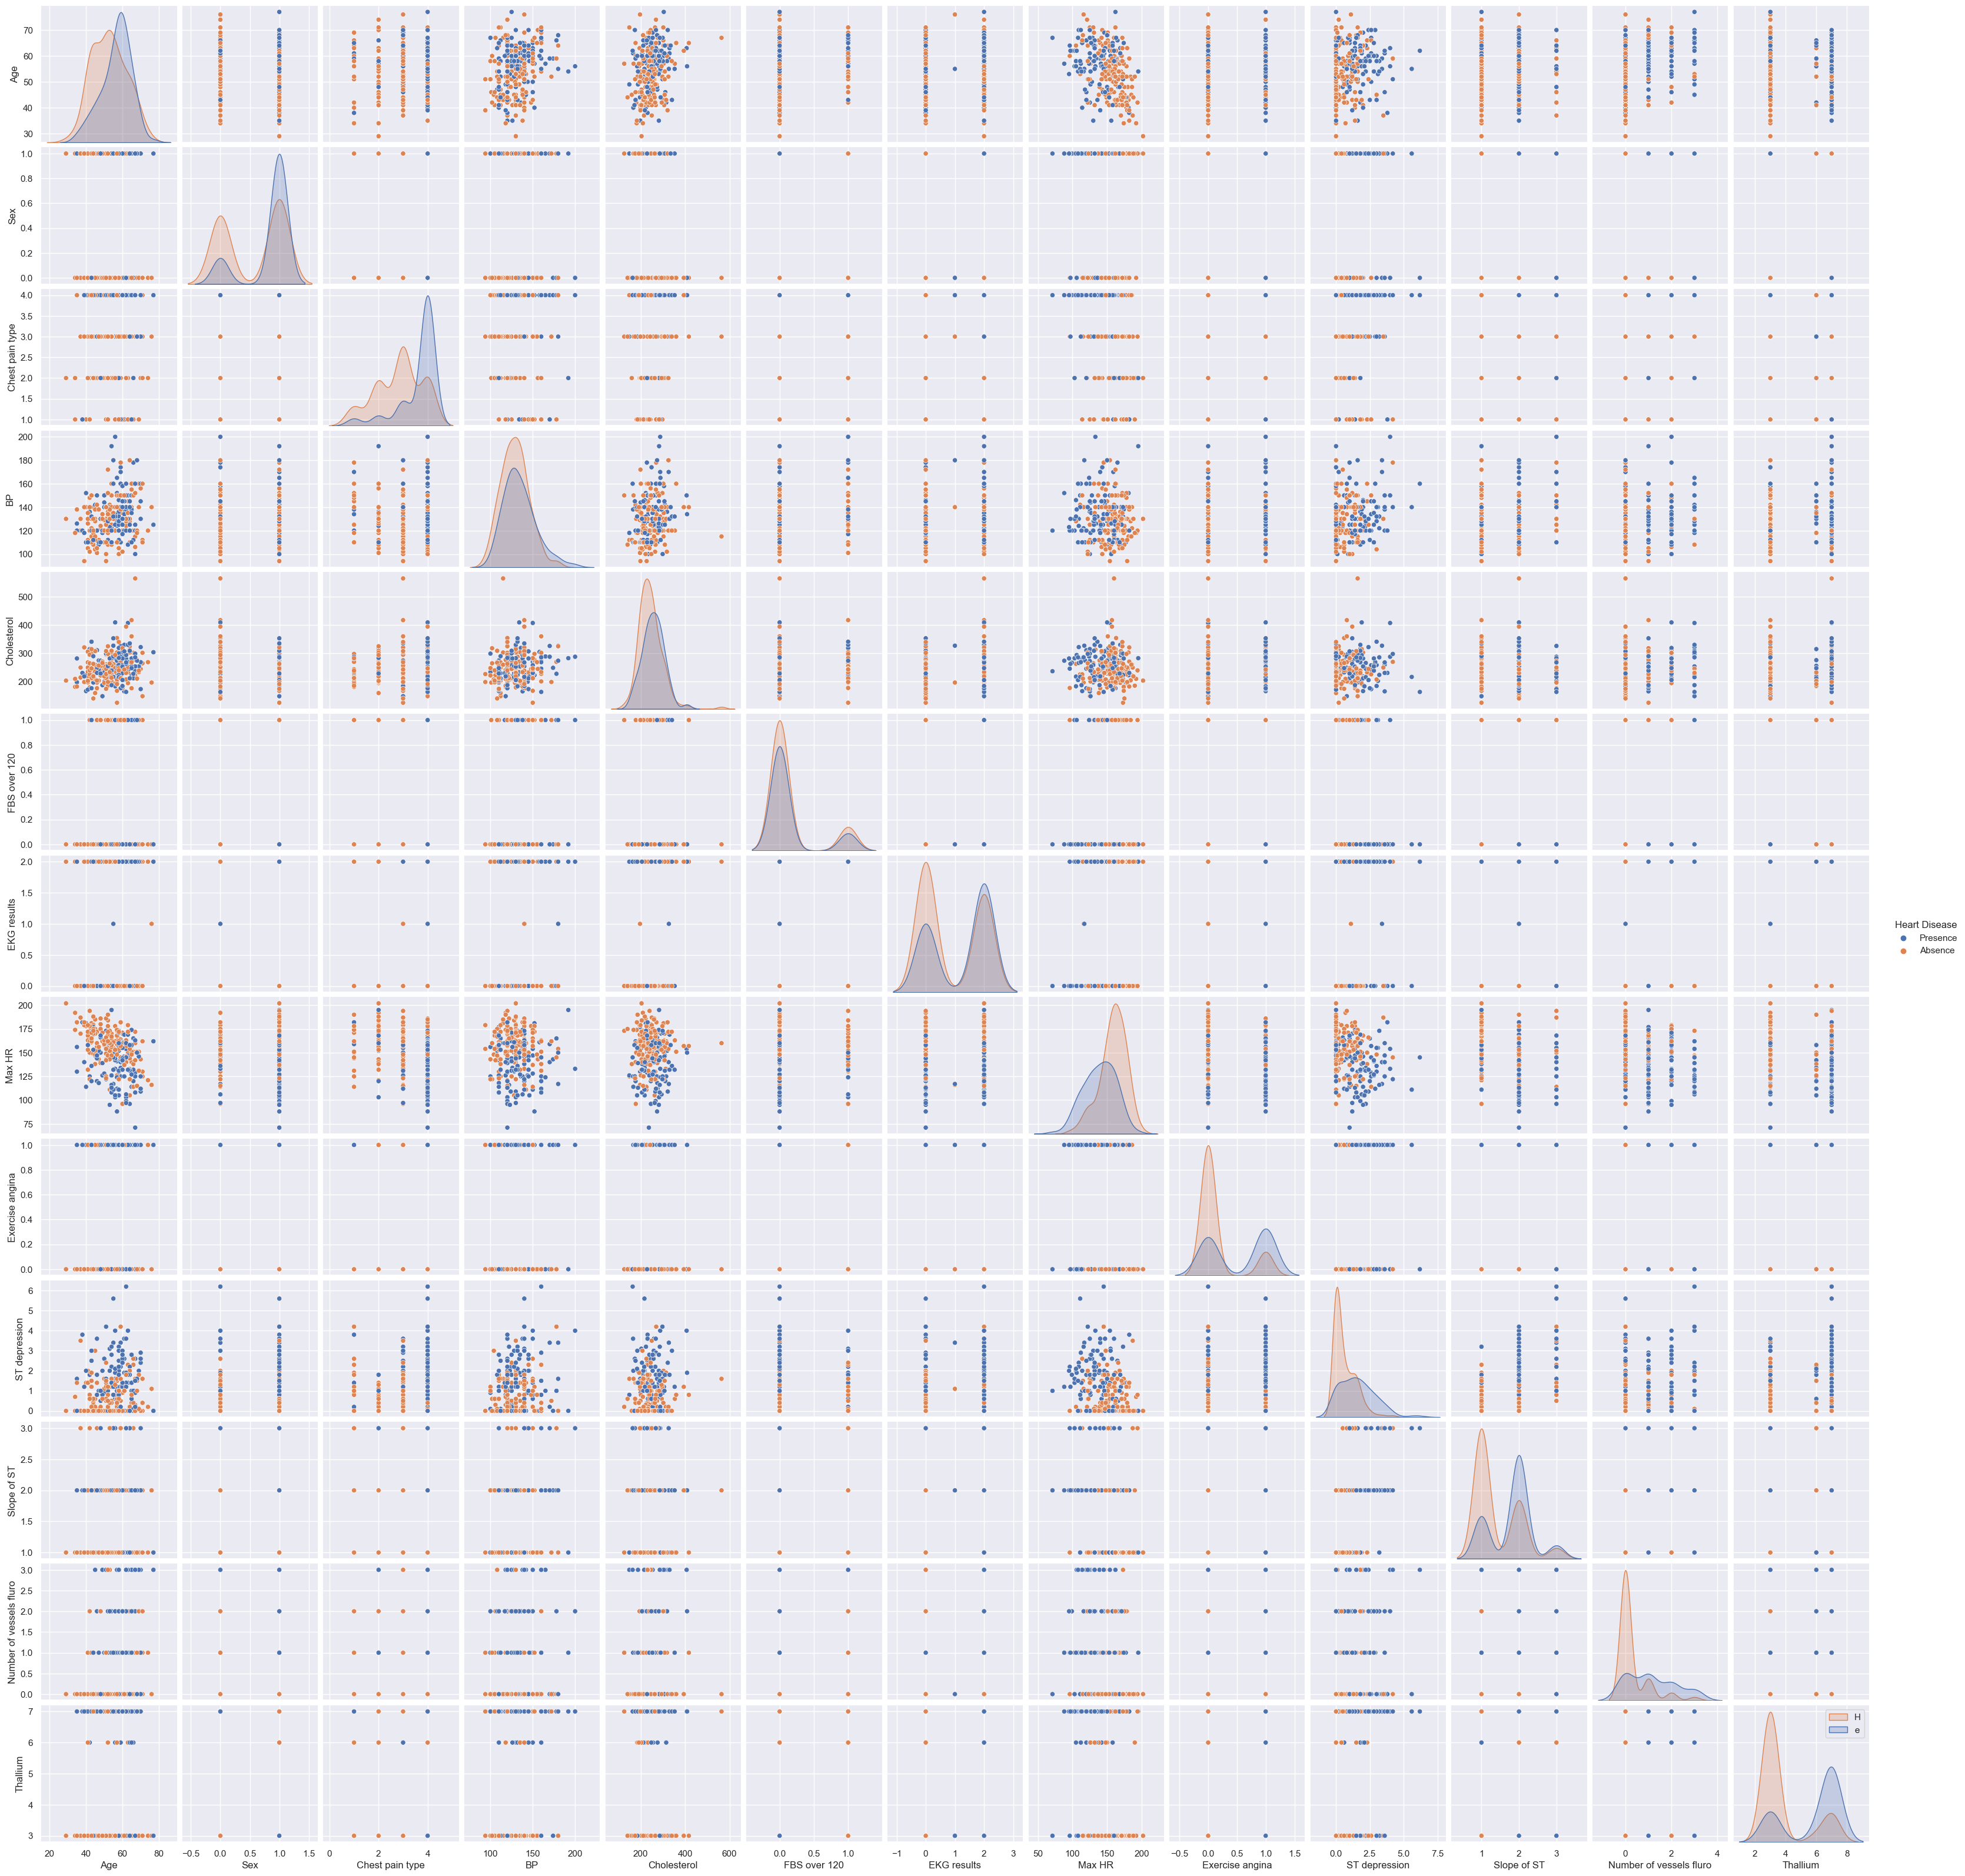

In [48]:
import seaborn as sns

sns.pairplot(data = df , hue= 'Heart Disease')
plt.legend('Heart Disease')

In [49]:
df['Heart Disease'] = df['Heart Disease']. replace(['Absence','Presence'], [0,1]) # replacce or encoding or cat.type kora

In [50]:
#label=LabelEncoder()
#for col in df:
 #   df[col]=label.fit_transform(df[col])
#df 

In [51]:
x = df.drop('Heart Disease',axis=1)
y = df[['Heart Disease']]

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.75,random_state=42) 

In [54]:
Clf = DecisionTreeClassifier() 

In [55]:
Clf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [56]:
test_score = Clf.score(xtest,ytest)
test_score

0.7205882352941176

In [57]:
Clf.score(xtest,ytest) # after sampling

0.7205882352941176

In [58]:
Clf.score(x,y) 

0.9296296296296296

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:

# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.8970588235294118
Training Score: 0.8613861386138614


C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\personal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 1.0
Testing accuracy: 0.8235294117647058


C:\Users\personal\AppData\Local\Temp\ipykernel_4652\4038136945.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


In [63]:


from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)

C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.8564356435643564
Testing Score: 0.8970588235294118


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:

# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

Testing score: 0.7058823529411765
Training score: 0.6188118811881188


C:\Users\personal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\personal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\personal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior

In [66]:
from xgboost import XGBClassifier

In [67]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 1.0
Testing accuracy: 0.8235294117647058


In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gaussNB = GaussianNB()

In [70]:
gaussNB.fit(xtrain,ytrain)

C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [71]:
Y_pred_nb = gaussNB.predict(xtest)
Y_pred_nb

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [72]:
print('The value of accuracy score is ', accuracy_score(ytest,Y_pred_nb))

NameError: name 'accuracy_score' is not defined

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)
acc = nb.score(xtest,ytest)*100
acc

C:\Users\personal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


86.76470588235294

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = nb_classifier.predict(xtest)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

In [ ]:
Finish

# Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over = RandomOverSampler(random_state=42)

In [ ]:
x_new , y_new = over.fit_resample(x,y)

# Hold Out Cross Validation

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [ ]:
dt = DecisionTreeClassifier() 

In [ ]:
dt.fit(xtrain,ytrain) 

In [ ]:
dt.score(xtest,ytest) # after sampling

In [ ]:
dt.score(xtrain,ytrain) # after sampling

# Without sampling¶

In [ ]:
x.shape

In [ ]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [ ]:
dt.fit(xtrain1, ytrain1) 

In [ ]:
dt.score(xtest1,ytest1) # imbalanced old data

# Random Forest

In [ ]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)


In [ ]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

# K Fold Cross Validation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True) #each fold contain 25% data

In [ ]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold) 

In [ ]:
result

In [ ]:
result.mean()

In [ ]:
result.max()

In [ ]:
result.min()

# dimantionally reduction using pca

In [ ]:
mmx = MinMaxScaler()

In [ ]:
scaled_x = mmx.fit_transform(x_new)

In [ ]:
scaled_x.shape

In [ ]:
scaled_x

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [ ]:
x_pca

In [ ]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42) 

In [ ]:
xtrain

# KNeighborsClassifier

In [ ]:

# Create a KNN classifier object with 100 neighbors
knn = KNeighborsClassifier(n_neighbors=100)

# Train the classifier using the training data
knn.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

# Calculate the accuracy score on the training data
training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

# XGBClassifier

In [ ]:
# Create an instance of XGBClassifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

# RandomForestClassifier

In [ ]:
# Focal cell:
rf = RandomForestClassifier()

# Train the random forest model
rf.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the testing data
test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

# ExtraTreesClassifier

In [ ]:

# Create an instance of the ExtraTreesClassifier
extr = ExtraTreesClassifier()

# Fit the model to the training data
extr.fit(xtrain, ytrain)

# Evaluate the model on the testing data
test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

# DecisionTreeClassifier

In [ ]:
# Create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier() 

# Fit the model to the training data
dt.fit(xtrain,ytrain)

# Evaluate the model on the testing data
test_score= dt.score(xtest,ytest) # after sampling
print("Testing Score:", test_score)

# Evaluate the model on the training data
train_score= dt.score(xtrain,ytrain) # after sampling
print("Training Score:", train_score)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:

# Create a Logistic Regression model
lg = LogisticRegression()

# Train the model on the training data
lg.fit(xtrain, ytrain)

# Calculate the accuracy score on the test data
test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)
# Calculate the accuracy score on the training data
train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)


# Support Vector Machine (SVM)

In [ ]:


from sklearn import svm
from sklearn.svm import SVC
# Create an instance of SVM classifier with linear kernel
sv = SVC(kernel='linear')

# Train the classifier using the training data
sv.fit(xtrain, ytrain)

# Calculate the accuracy score on the training data
train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

# Calculate the accuracy score on the testing data
test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)

# classification model

In [ ]:
# Split data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Initialize and train classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(),
    #'Support Vector Machine': SVC(),
}

for model_name, model in models.items():
    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions
    y_pred = model.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


# Ensemble 

In [ ]:
# Bagging
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))

# Boosting
boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

# Stacking
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))


# Modeling

In [ ]:
def evaluate_model(model, xtest, ytest):

    # Predict Test Data 
    ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
xtrain

In [ ]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)


# Evaluate Model
knn_eval = evaluate_model(knn, xtest, ytest)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

In [ ]:
# Building a model using KNeighborsClassifier 
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

# Evaluate Model
rf1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

In [ ]:
# Building a model using KNeighborsClassifier 
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)


# Evaluate Model
extra_eval = evaluate_model(extra, xtest, ytest)

# Print result
print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

In [ ]:
# Building a model using KNeighborsClassifier 
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


# Evaluate Model
xgb_eval = evaluate_model(xgb, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

In [ ]:
# Building a model using KNeighborsClassifier 
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)


# Evaluate Model
dt1_eval = evaluate_model(rf1, xtest, ytest)

# Print result
print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

In [ ]:
# took much more time thats why its stoped
from sklearn.svm import SVC
# Building a model using KNeighborsClassifier 
sv = SVC(kernel='linear')

sv.fit(xtrain, ytrain)


# Evaluate Model
sv_eval = evaluate_model(sv, xtest, ytest)

# Print result
print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Cohens Kappa Score:', sv_eval['kappa'])
print('Area Under Curve:', sv_eval['auc'])
print('Confusion Matrix:\n', sv_eval['cm'])

In [ ]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = KNeighborsClassifier(n_neighbors=3)
model3 = RandomForestClassifier()
model4 = XGBClassifier()
model5 = ExtraTreesClassifier()

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt1', model1), ('knn', model2),('rf1', model3),('xgb', model4),('extra', model5) ],
    voting='soft'  # You can also use 'hard' voting
)

# Train the ensemble model
ensemble.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

# save ai model

In [ ]:
pickle.dump(extra, open('heart_disease_pridiction','wb'))

In [ ]:
reg = pickle.load(open('heart_disease_pridiction', 'rb'))

# RandomizedSearchCV

In [ ]:
#just for checking

In [ ]:
# Define the hyperparameter distribution
param_dist = {
    'n_estimators': sp_randint(20, 300),
    'max_features' : ['sqrt','log2'],
    'criterion' : ['gini','entropy'],
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'bootstrap': [True, False]
}

# Create the model
model = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_new, y_new)

# Get the best hyperparameter values
best_params = random_search.best_params_
# Print the best parameter values and the corresponding accuracy score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

print("Test Score: ", random_search.score(xtest, ytest))



In [ ]:
rf1 = random_search.best_estimator_

In [ ]:
rf1.fit(xtrain, ytrain) # training again

In [ ]:
rf1.score(xtest, ytest)